# Natural Language Processsing with a Rule-based Model
NLTK SentimentIntensityAnalyzer is built on the NLTK VADER package and is a rule/lexicon-based sentiment analyzer. The module is built to handle social media data. Pre-processing is handled internally within the modules (i.e. removing punctuation, stopwords, graphics, etc.)

https://www.nltk.org/api/nltk.sentiment.vader.html

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer # rule/lexicon-based sentiment analyzer
import operator
import sqlite3
import os
from os.path import join
import pandas as pd
from matplotlib import pyplot as plt

# local imports
from comment_scraper import get_sql_table
from channel_surfer import upload_tosql

In [3]:
# analysis testing here is done on comments scraped from MSNBC videos
DATA_DIR = 'C:\\Users\\keatu\\Regis_archive\\practicum2_data\\'
dbname = os.path.join(DATA_DIR, "Youtube_Data_msnbc.db")

In [10]:
# combine scraped comments and channel info into one dataframe
cdf = get_sql_table('comments', dbname)
cdf = cdf.repace("nan",0)
videos = get_sql_table('videos',dbname)
videos = videos.replace("nan",0)
combined = cdf.merge(videos, on='videoId', suffixes=("","_video"))
combined = combined.replace("nan", 0)

In [12]:
# Print unique video count
combined.columns

Index(['index', 'authorDisplayName', 'canRate', 'commentId', 'likeCount',
       'publishedAt', 'textDisplay', 'textOriginal', 'updatedAt', 'videoId',
       'viewerRating', 'index_video', 'channelId', 'channelTitle',
       'description', 'publishedAt_video', 'title', 'commentCount',
       'favoriteCount', 'likeCount_video', 'viewCount'],
      dtype='object')

In [21]:
videos = videos.replace("nan",0)

In [22]:
# Take the top 10 most popular videos using likeCount
top10videos = videos.sort_values('likeCount', ascending=False).head(10)


In [15]:
# Create sentiment nltk analyzer and apply the polarity_scores function on the comments
sia = SentimentIntensityAnalyzer()
top10['sentiment_score'] = top10["textOriginal"].apply(lambda x: sia.polarity_scores(x)['compound'])

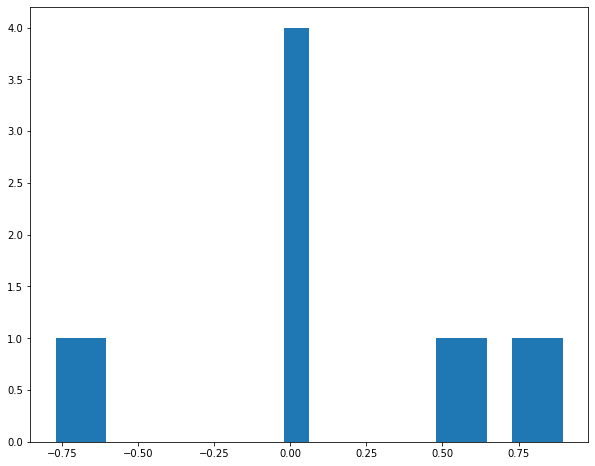

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
ax.hist(top10['sentiment_score'], bins=20)
plt.show()